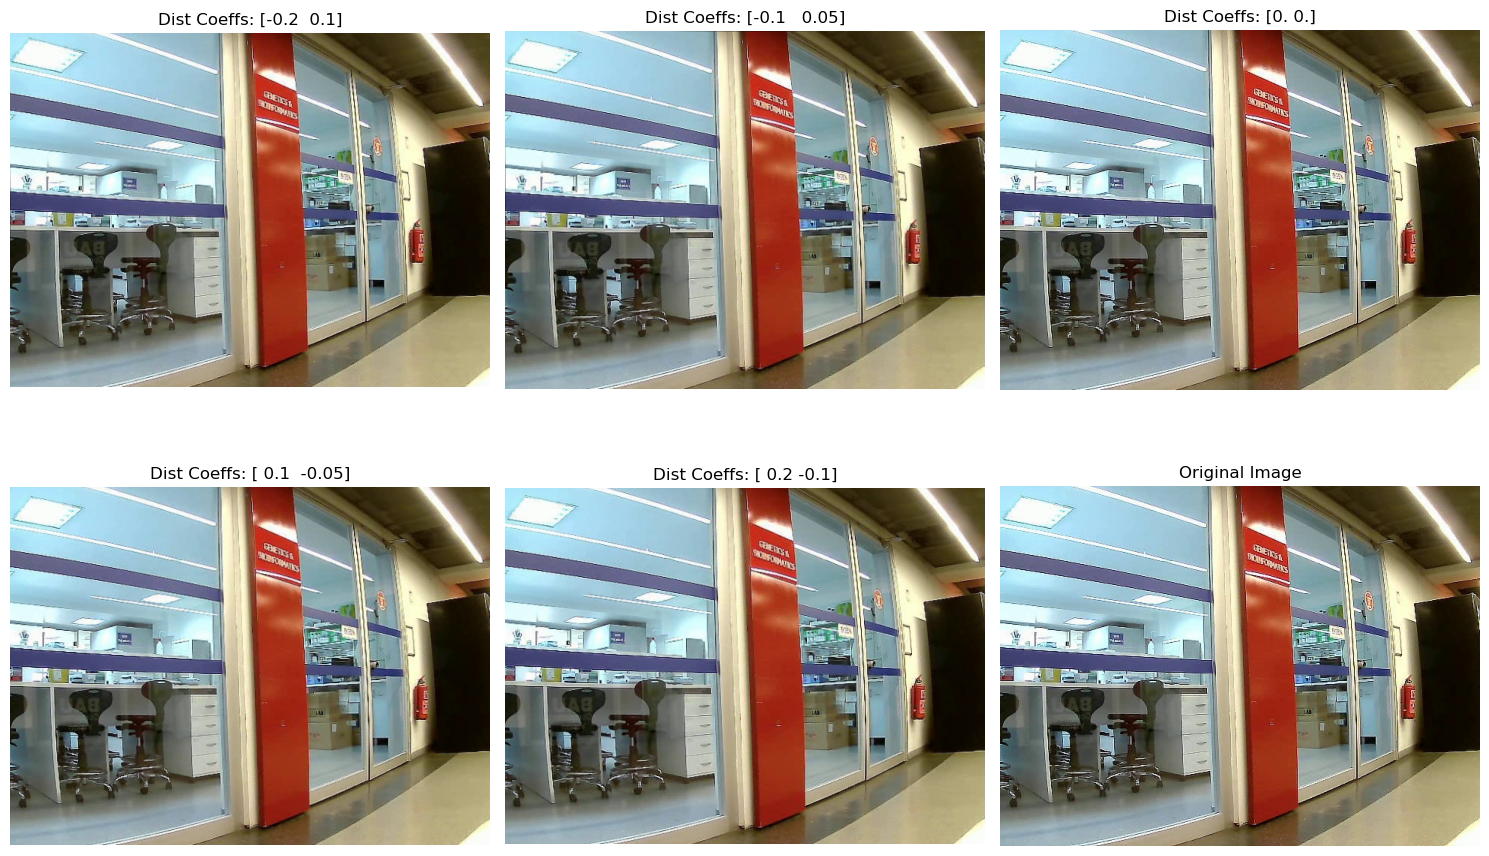

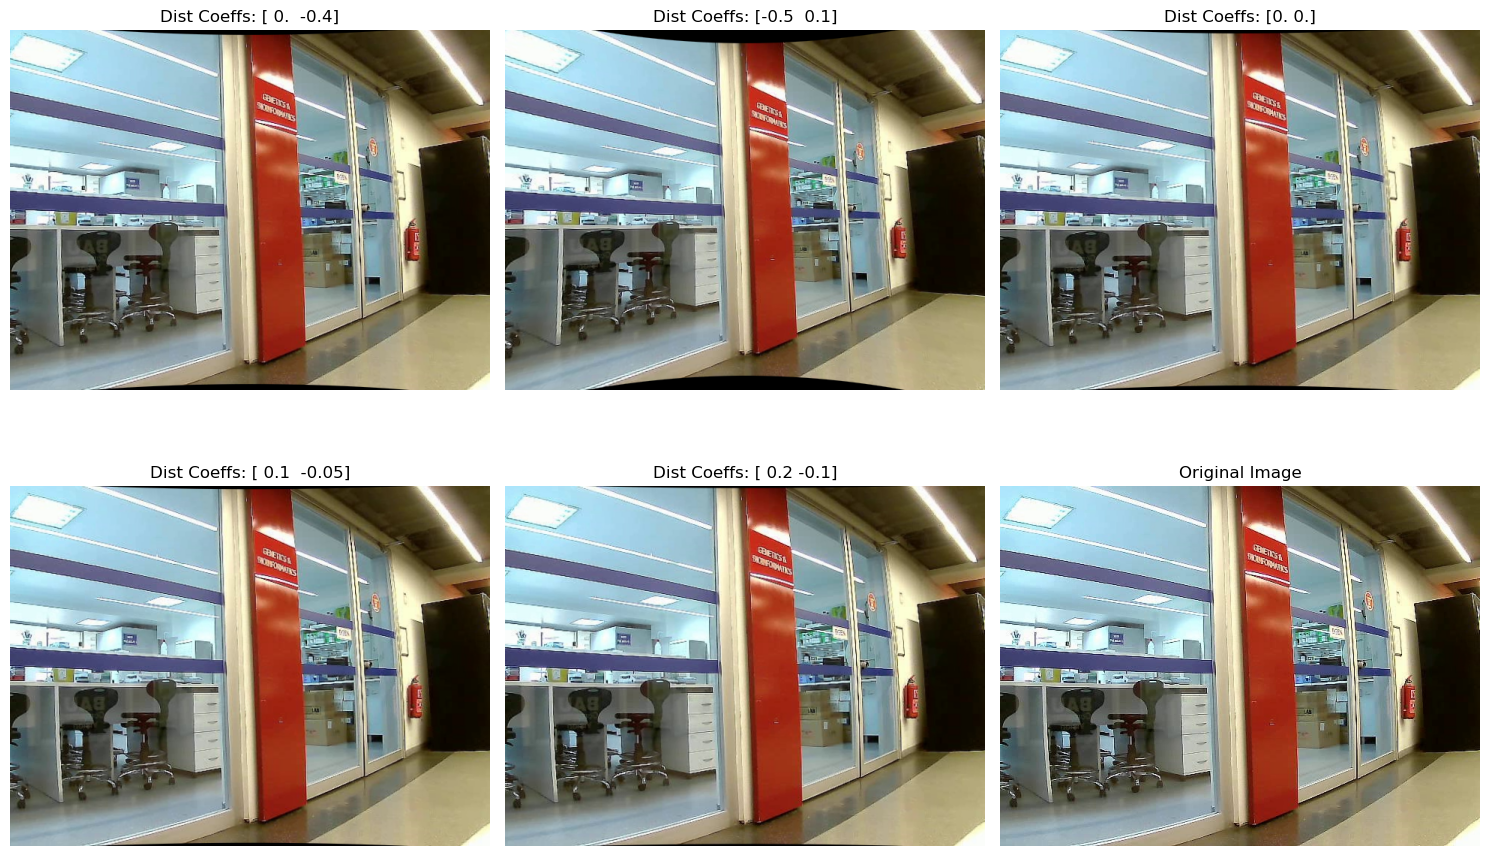

In [78]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('../data/video1_frame1.jpg')

# 假设相机内参矩阵（需要根据具体相机参数调整）
K = np.array([[800, 0, img.shape[1] / 2],
              [0, 800, img.shape[0] / 2],
              [0, 0, 1]], dtype=np.float32)

# 定义不同的鱼眼畸变系数
dist_coeffs_list = [
    np.array([0, -0.40, 0, 0], dtype=np.float32),
    np.array([-0.5, 0.1, 0, 0], dtype=np.float32),
    np.array([0.0, 0.0, 0, 0], dtype=np.float32),  # 无畸变
    np.array([0.1, -0.05, 0, 0], dtype=np.float32),
    np.array([0.2, -0.1, 0, 0], dtype=np.float32)
]

# 创建一个图形窗口
plt.figure(figsize=(15, 10))

for i, dist_coeffs in enumerate(dist_coeffs_list):
    # 使用鱼眼校正函数
    DIM = img.shape[:2][::-1]
    K_new = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(K, dist_coeffs, DIM, np.eye(3), balance=1)
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, dist_coeffs, np.eye(3), K_new, DIM, cv2.CV_16SC2)
    corrected_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    # 显示图像
    plt.subplot(2, 3, i+1)
    plt.title(f'Dist Coeffs: {dist_coeffs[:2]}')
    plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# 显示原始图像
plt.subplot(2, 3, 6)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# 显示所有图像
plt.tight_layout()
plt.show()
